In [2]:
# data processing
import pandas as pd
import numpy as np
from scipy.signal import medfilt
from sklearn.preprocessing import MinMaxScaler

import pywt
#visualization
import matplotlib.pyplot as plt



#model estimation
from sklearn.metrics import accuracy_score


#custom functions
from config import *
from DataGenerator import *

# Load the data

In [29]:
DATA_PATH = './data/raw/'
TEST_NAME = f'{DATA_PATH}test.csv'

test = pd.read_csv(TEST_NAME)
test.head()

,row_id,well_id,GR
0,0,5000,134.943504
1,1,5000,127.004675
2,2,5000,133.159255
3,3,5000,134.411762
4,4,5000,135.748644


In [8]:
GetData=DataGenerator()
model=DL_model(input_size=INPUT_SIZE ,hyperparams=HYPERPARAM)

./data/raw/
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1104, 34)     0                                            
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 1104, 64)     8768        input_2[0][0]                    
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 1104, 64)     0           conv1d_16[0][0]                  
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 1104, 64)     16448       dropout_8[0][0]                  
________________________________________________________________________________

In [10]:
model.load_weights('./data/weights/UNET_model_0_.h5')

In [36]:
predictions = model.predict(GetData.X_test)
predictions = predictions[:,:1100:,:]

In [18]:
def predictions_postprocess(pred):

    final_predicitons = np.zeros((pred.shape[0],pred.shape[1]))

    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            m_val = np.max(pred[i,j, :])
            final_predicitons[i,j] = np.where(pred[i,j, :] == m_val)[0][0]

    return final_predicitons

In [34]:
predictions = predictions_postprocess(predictions)

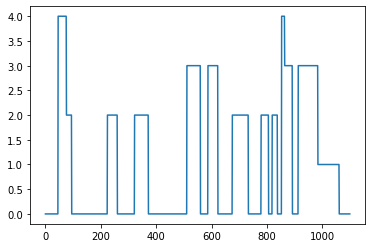

In [22]:
plt.plot(predictions[0,:])

In [28]:
predictions.shape

(350, 1100)

In [38]:
def prepare_test(pred_test, df_test):
    
    wells = df_test['well_id'].sort_values().unique().tolist()
    list_df_wells = [df_test.loc[df_test['well_id'].isin([w]), :].copy() for w in wells]
    
    for df in list_df_wells:
        df.index = np.arange(df.shape[0])

    for i, df_well in enumerate(list_df_wells):
        df_well['label'] = np.argmax(pred_test[i, :], axis=1)

    result = pd.concat(list_df_wells, axis=0)
    return result


In [39]:
submit = prepare_test(predictions, test)

In [43]:
submit[['row_id', 'well_id', 'label']].to_csv('data/result/0.987_submit.csv', index=False)